<a href="https://colab.research.google.com/github/ToaiDinh/ANN_AI/blob/main/CNN_SelfRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Activation,Dropout
from keras.utils import np_utils
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filepath = 'drive/MyDrive/data_training/face_recognition/data/train'+str(0)+'.jpg'
img = load_img(filepath,target_size=(150,150))
img = img_to_array(img)
x = np.array([img])
for i in range(1,90):
  filepath = 'drive/MyDrive/data_training/face_recognition/data/train'+str(i)+'.jpg'
  img = load_img(filepath,target_size=(150,150))
  img = img_to_array(img)
  img = img.astype('float32')
  x = np.concatenate((x,[img]),axis=0)
arr_1 = np.zeros((30,1),np.uint8)
arr_2 = np.ones((30,1),np.uint8)
y = np.concatenate((arr_1,arr_2),axis=0)
y = np.concatenate((y,arr_1),axis=0)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print(x.shape)
print(y.shape)

(90, 150, 150, 3)
(90, 1)


In [ ]:
print(np.max(x))
print(np.min(x))
print(np.max(y))
print(np.min(y))

255.0
0.0
1
0


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
#y_train = np_utils.to_categorical(y_train,2)
#y_test = np_utils.to_categorical(y_test,2)
print("x train shape: ",x_train.shape)
print("y train shape: ",y_train.shape)
print("x test shape: ",x_test.shape)
print("y test shape: ",y_test.shape)
print("Max x train ",np.max(x_train))
print("Min x train ",np.min(x_train))

x train shape:  (63, 150, 150, 3)
y train shape:  (63, 1)
x test shape:  (27, 150, 150, 3)
y test shape:  (27, 1)
Max x train  1.0
Min x train  0.0


In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.layers import Flatten
model = Sequential()
model.add(Conv2D(256,(3,3),activation='relu',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 256)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1440000)           0         
                                                                 
 dense (Dense)               (None, 256)               368640256 
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 368,647,681
Trainable params: 368,647,681
Non-trainable params: 0
__________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
16/16 [==============================] - 115s 7s/step - loss: 22.6629 - accuracy: 0.6190 - val_loss: 0.3732 - val_accuracy: 0.8519
Epoch 2/10
16/16 [==============================] - 111s 7s/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 4.4407e-04 - val_accuracy: 1.0000
Epoch 3/10
16/16 [==============================] - 112s 7s/step - loss: 6.5572e-05 - accuracy: 1.0000 - val_loss: 9.1579e-05 - val_accuracy: 1.0000
Epoch 4/10
16/16 [==============================] - 117s 7s/step - loss: 2.2338e-05 - accuracy: 1.0000 - val_loss: 3.8150e-05 - val_accuracy: 1.0000
Epoch 5/10
16/16 [==============================] - 113s 7s/step - loss: 7.7966e-06 - accuracy: 1.0000 - val_loss: 3.3564e-05 - val_accuracy: 1.0000
Epoch 6/10
16/16 [==============================] - 112s 7s/step - loss: 3.8687e-06 - accuracy: 1.0000 - val_loss: 1.5012e-05 - val_accuracy: 1.0000
Epoch 7/10
16/16 [==============================] - 112s 7s/step - loss: 2.2576e-06 - accuracy: 1.0000 - val_loss: 1.

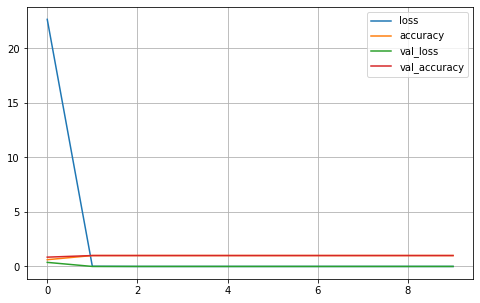

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


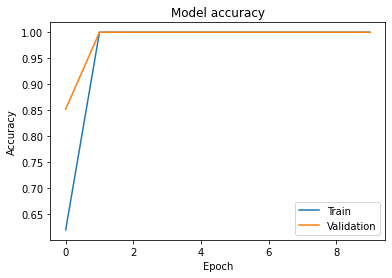

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=4,validation_data=(x_test,y_test),verbose=1)
score = model.evaluate(x_test,y_test,verbose=0)
print("Error: ",score[0])
print("Accuracy: ",score[1])
model_json = model.to_json()
with open('drive/MyDrive/Model/Self_Recognition/self_recognition_config.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('drive/MyDrive/Model/Self_Recognition/self_recognition_weights.h5')
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
print('\n')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

In [ ]:
label = ['Khong phai Toai','Toai']

[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]


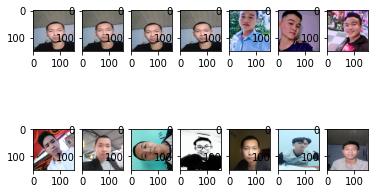

In [ ]:
real = [1,1,1,1,0,0,0,0,1,0,0,1,0,0]
pre = []
for i in range(14):
  url = 'drive/MyDrive/data_test/self_recognition/test'+str(i)+'.jpg'
  test = load_img(url,target_size=(150,150))
  plt.subplot(2,7,i+1)
  plt.imshow(test)
  test = img_to_array(test)
  test = test.reshape(1,150,150,3)
  test = test.astype('float32')
  test = test/255.0
  #pre.append(int(np.argmax(model.predict(test))))
  pre.append(int(np.round(model.predict(test))[0][0]))
print(real)
print(pre)

Khong phai Toai


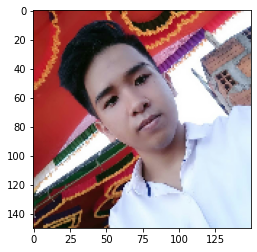

In [ ]:
url = 'drive/MyDrive/data_test/self_recognition/test'+str(7)+'.jpg'
test = load_img(url,target_size=(150,150))
plt.imshow(test)
test = img_to_array(test)
test = test.reshape(1,150,150,3)
test = test.astype('float32')
test = test/255.0
print(label[int(np.round(model.predict(test))[0][0])])